In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

stocks = {
    'AAPL': pd.read_csv('aapl.us.csv'),
    'AMZN': pd.read_csv('amzn.us.csv'),
    'GOOGL': pd.read_csv('googl.us.csv'),
    'MSFT': pd.read_csv('msft.us.csv'),
    'TSLA': pd.read_csv('tsla.us.csv')
}

In [ ]:
for ticker, df in stocks.items():
    print(ticker)
    print(df.shape)
    print(list(df.columns))
    print(f"{df['Date'].min()}  {df['Date'].max()}")
    print(df.isnull().sum().sum())

AAPL
(8364, 7)
['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt']
1984-09-07  2017-11-10
0
AMZN
(5153, 7)
['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt']
1997-05-16  2017-11-10
0
GOOGL
(3333, 7)
['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt']
2004-08-19  2017-11-10
0
MSFT
(7983, 7)
['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt']
1986-03-13  2017-11-10
0
TSLA
(1858, 7)
['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt']
2010-06-28  2017-11-10
0


In [ ]:
processed_stocks = {}

for ticker, df in stocks.items():
    stock_df = df.copy()
    stock_df['Date'] = pd.to_datetime(stock_df['Date'])
    stock_df = stock_df.sort_values('Date').reset_index(drop=True)
    stock_df = stock_df.dropna(subset=['Close'])
    stock_df['Ticker'] = ticker
    stock_df['Daily_Return'] =( (stock_df['Close'] - stock_df['Open']) / stock_df['Open'] )*100
    stock_df['MA_7'] = stock_df['Close'].rolling(window=7).mean()
    stock_df['MA_30'] = stock_df['Close'].rolling(window=30).mean()
    stock_df['Volatility_30'] = stock_df['Daily_Return'].rolling(window=30).std()
    processed_stocks[ticker] = stock_df

combined_df = pd.concat(processed_stocks.values(), ignore_index=True)

print(combined_df.head())

        Date     Open     High      Low    Close    Volume  OpenInt Ticker  \
0 1984-09-07  0.42388  0.42902  0.41874  0.42388  23220030        0   AAPL   
1 1984-09-10  0.42388  0.42516  0.41366  0.42134  18022532        0   AAPL   
2 1984-09-11  0.42516  0.43668  0.42516  0.42902  42498199        0   AAPL   
3 1984-09-12  0.42902  0.43157  0.41618  0.41618  37125801        0   AAPL   
4 1984-09-13  0.43927  0.44052  0.43927  0.43927  57822062        0   AAPL   

   Daily_Return  MA_7  MA_30  Volatility_30  
0      0.000000   NaN    NaN            NaN  
1     -0.599226   NaN    NaN            NaN  
2      0.907893   NaN    NaN            NaN  
3     -2.992867   NaN    NaN            NaN  
4      0.000000   NaN    NaN            NaN  


In [ ]:
'''ten_years_ago = datetime.now() - timedelta(days=365*10)
recent_data = combined_df[combined_df['Date'] >= ten_years_ago].copy()'''




recent_data = combined_df[(combined_df['Date'] >= datetime(2007, 1, 1)) &
                         (combined_df['Date'] <= datetime(2017, 12, 31))].copy()

In [ ]:
multi_df = recent_data.set_index(['Ticker', 'Date'])

In [ ]:
returns_summary = recent_data.groupby('Ticker')['Daily_Return'].describe()
print(returns_summary)

         count      mean       std        min       25%       50%       75%  \
Ticker                                                                        
AAPL    2736.0 -0.011716  1.681467 -11.906940 -0.848737  0.038220  0.852318   
AMZN    2736.0  0.097172  1.998745 -12.307692 -0.928517  0.005214  1.082914   
GOOGL   2736.0 -0.027615  1.403632  -9.181922 -0.697279 -0.016902  0.711541   
MSFT    2736.0  0.052779  1.348854  -7.069262 -0.610972  0.029293  0.754848   
TSLA    1858.0 -0.017755  2.789449 -19.894552 -1.420261 -0.090876  1.419860   

              max  
Ticker             
AAPL    12.968195  
AMZN    16.024902  
GOOGL    8.765927  
MSFT    11.304846  
TSLA    25.736842  


In [ ]:

print(recent_data.groupby('Ticker')['Volatility_30'].describe())


         count      mean       std       min       25%       50%       75%  \
Ticker                                                                       
AAPL    2736.0  1.508412  0.756547  0.465888  1.043828  1.300871  1.787813   
AMZN    2736.0  1.781942  0.912166  0.442576  1.281945  1.570841  2.042366   
GOOGL   2736.0  1.264675  0.621075  0.310233  0.876747  1.096438  1.437349   
MSFT    2736.0  1.214288  0.593282  0.400201  0.881332  1.070213  1.379750   
TSLA    1829.0  2.516369  0.852728  1.082670  1.951506  2.308121  2.932357   

             max  
Ticker            
AAPL    5.986449  
AMZN    7.271608  
GOOGL   4.486543  
MSFT    4.680074  
TSLA    8.039439  


ACCORDING TO VOLATILTY- tsla most volatile




ACCORDING TO DAILY RETURN MEAN  - TSLA



In [ ]:
print(recent_data.groupby('Ticker')['Close'].describe())

         count        mean         std      min       25%      50%        75%  \
Ticker                                                                          
AAPL    2736.0   64.305140   41.558909   10.014   24.3100   58.204   96.64725   
AMZN    2736.0  313.072601  266.364973   35.030   93.4650  224.895  386.38750   
GOOGL   2736.0  440.662803  228.613702  128.720  263.4150  326.755  580.83500   
MSFT    2736.0   33.494330   15.241419   12.705   23.0500   26.021   42.61750   
TSLA    1858.0  150.355047  107.023737   15.800   31.1125  184.850  230.92000   

            max  
Ticker           
AAPL     175.61  
AMZN    1132.88  
GOOGL   1058.29  
MSFT      84.56  
TSLA     385.00  


In [ ]:
recent_data.to_csv('processed_stocks_combined.csv', index=False)
multi_df.to_csv('processed_stocks_multiindex.csv')

In [ ]:
for ticker in ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA']:
    ticker_data = recent_data[recent_data['Ticker'] == ticker]
    ticker_data.to_csv(f'processed_{ticker.lower()}.csv', index=False)

print(len(recent_data))
print(recent_data['Ticker'].nunique())
print(recent_data['Ticker'].value_counts())

print(recent_data.head(10))
print(list(recent_data.columns))
print(multi_df.head())

12802
5
Ticker
AAPL     2736
AMZN     2736
GOOGL    2736
MSFT     2736
TSLA     1858
Name: count, dtype: int64
           Date    Open    High     Low   Close     Volume  OpenInt Ticker  \
5628 2007-01-03  11.049  11.087  10.486  10.731  345302870        0   AAPL   
5629 2007-01-04  10.780  11.007  10.733  10.969  236252357        0   AAPL   
5630 2007-01-05  10.992  11.038  10.807  10.893  232773093        0   AAPL   
5631 2007-01-08  11.011  11.081  10.922  10.946  222149027        0   AAPL   
5632 2007-01-09  11.075  11.907  10.906  11.854  933759387        0   AAPL   
5633 2007-01-10  12.135  12.526  11.968  12.420  820730037        0   AAPL   
5634 2007-01-11  12.289  12.394  12.178  12.267  401661844        0   AAPL   
5635 2007-01-12  12.107  12.174  11.939  12.117  366027068        0   AAPL   
5636 2007-01-16  12.257  12.452  12.222  12.433  346840092        0   AAPL   
5637 2007-01-17  12.489  12.499  12.143  12.161  453218702        0   AAPL   

      Daily_Return       MA_7 

In [ ]:
recent_data['Date'] = pd.to_datetime(recent_data['Date'])

recent_data['Year'] = recent_data['Date'].dt.year
recent_data['Month'] = recent_data['Date'].dt.month

TSLA THE MAX VOLATILE MONTH AS EXPECTED :P

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

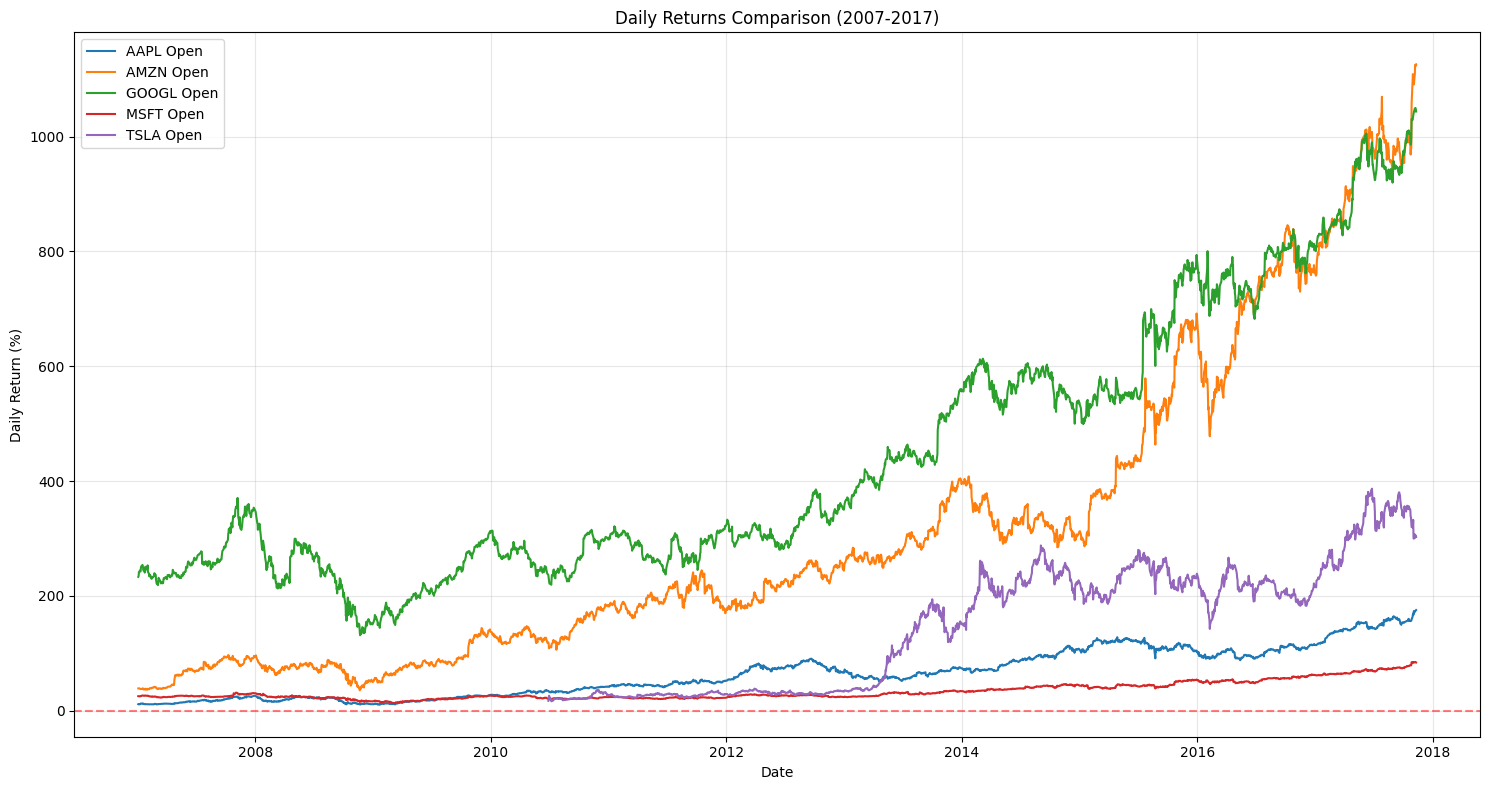

In [ ]:
def plot_daily_returns_combined(recent_data):
    plt.figure(figsize=(15, 8))

    for ticker in recent_data['Ticker'].unique():
        stock_data = recent_data[recent_data['Ticker'] == ticker]
        plt.plot(stock_data['Date'], stock_data['Open'], label=f'{ticker} Open')



    plt.title('Daily Returns Comparison (2007-2017)')
    plt.xlabel('Date')
    plt.ylabel('Daily Return (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


plot_daily_returns_combined(recent_data)




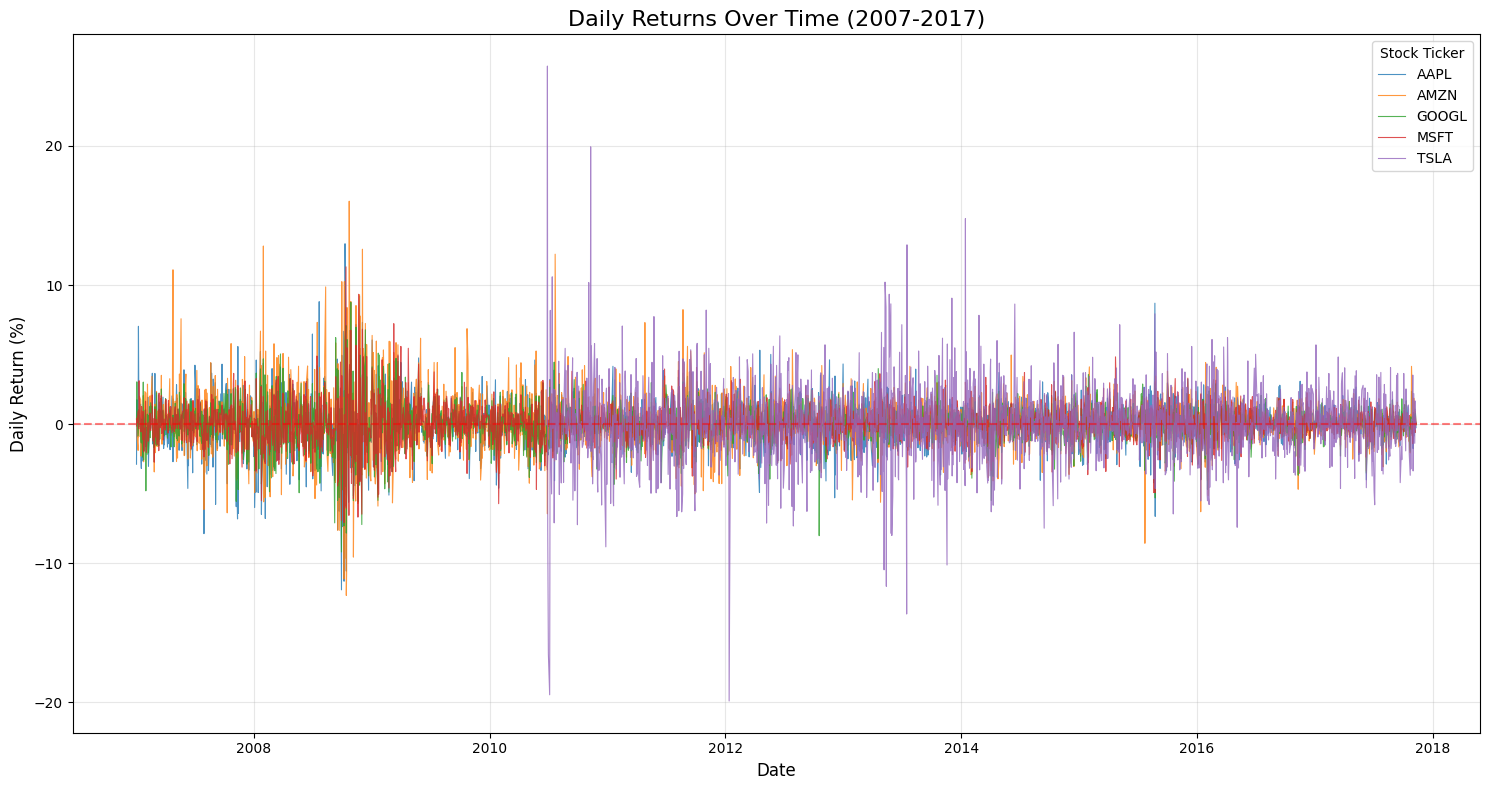

In [ ]:
def plot_daily_returns_seaborn(recent_data):
    plt.figure(figsize=(15, 8))

    for ticker in recent_data['Ticker'].unique():
        stock_data = recent_data[recent_data['Ticker'] == ticker]
        sns.lineplot(data=stock_data, x='Date', y='Daily_Return',
                    label=ticker, linewidth=0.8, alpha=0.8)

    plt.title('Daily Returns Over Time (2007-2017)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Daily Return (%)', fontsize=12)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    plt.grid(True, alpha=0.3)
    plt.legend(title='Stock Ticker')
    plt.tight_layout()
    plt.show()

plot_daily_returns_seaborn(recent_data)

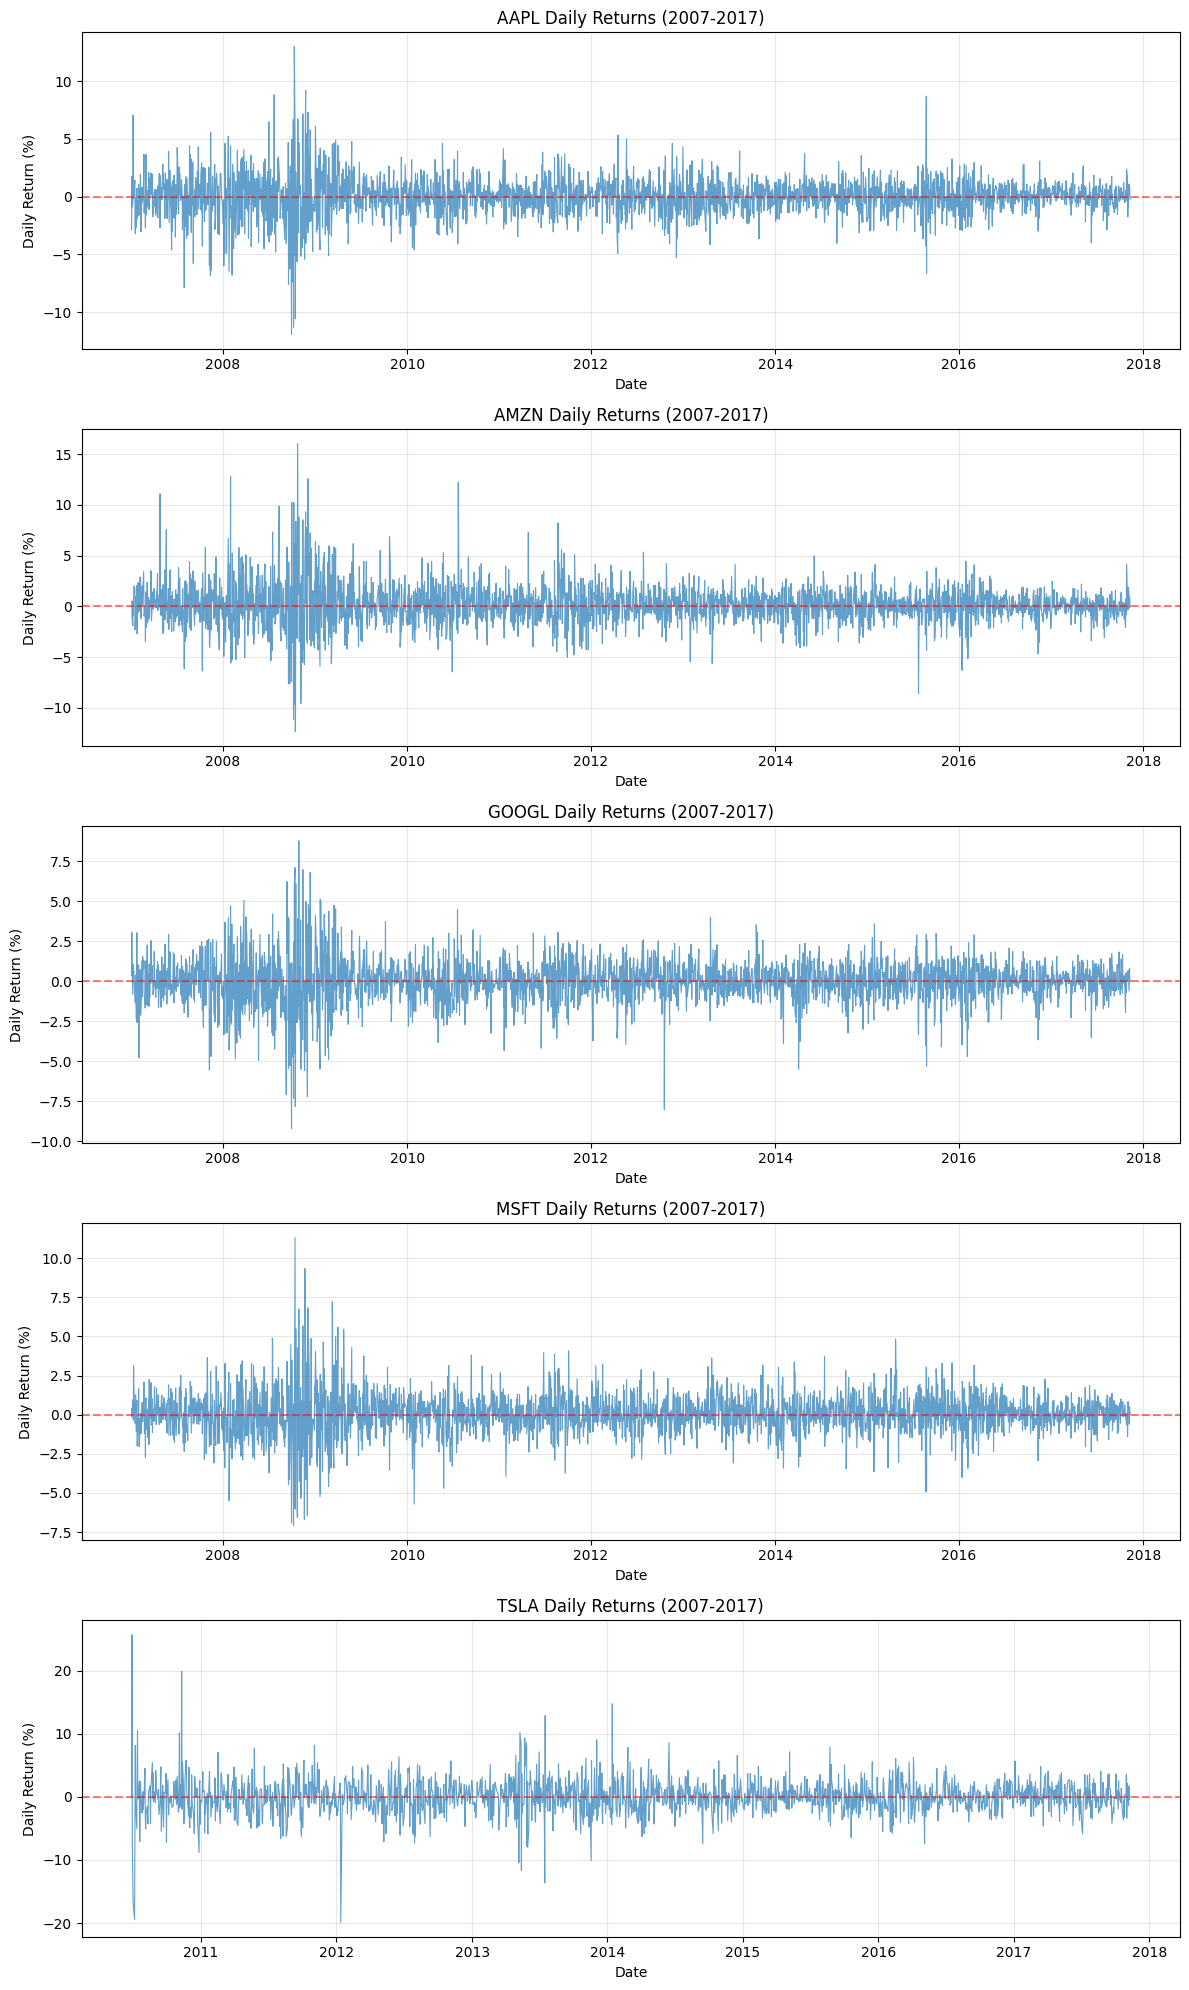

In [ ]:
def plot_daily_returns_subplots(recent_data):
    tickers = recent_data['Ticker'].unique()
    n_stocks = len(tickers)

    fig, axes = plt.subplots(n_stocks, 1, figsize=(12, 4*n_stocks))
    if n_stocks == 1:
        axes = [axes]

    for i, ticker in enumerate(tickers):
        stock_data = recent_data[recent_data['Ticker'] == ticker]
        axes[i].plot(stock_data['Date'], stock_data['Daily_Return'],
                    linewidth=0.8, alpha=0.7, label=ticker)
        axes[i].set_title(f'{ticker} Daily Returns (2007-2017)')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Daily Return (%)')
        axes[i].grid(True, alpha=0.3)
        axes[i].axhline(y=0, color='red', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


plot_daily_returns_subplots(recent_data)

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

amzn_data = pd.read_csv('amzn.us.csv')
amzn_data['Date'] = pd.to_datetime(amzn_data['Date'])
amzn_data = amzn_data.sort_values('Date').reset_index(drop=True)

amzn_data = amzn_data[(amzn_data['Date'] >= '2007-01-01') & (amzn_data['Date'] <= '2017-12-31')]
amzn_data = amzn_data.reset_index(drop=True)

amzn_data['Daily_Return'] = amzn_data['Close'].pct_change()
amzn_data['MA_7'] = amzn_data['Close'].rolling(window=7).mean()
amzn_data['MA_30'] = amzn_data['Close'].rolling(window=30).mean()
amzn_data['Volatility_30'] = amzn_data['Daily_Return'].rolling(window=30).std()

amzn_data['EMA_12'] = amzn_data['Close'].ewm(span=12).mean()
amzn_data['EMA_26'] = amzn_data['Close'].ewm(span=26).mean()
amzn_data['DayOfWeek'] = amzn_data['Date'].dt.dayofweek
amzn_data['Month'] = amzn_data['Date'].dt.month

amzn_data['EWMA_Vol'] = amzn_data['Daily_Return'].ewm(span=30).std()

def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

amzn_data['RSI'] = calculate_rsi(amzn_data['Close'])

split_idx = int(len(amzn_data) * 0.8)
train_data = amzn_data[:split_idx].copy()
test_data = amzn_data[split_idx:].copy()

print(f"Training data: {len(train_data)} rows")
print(f"Testing data: {len(test_data)} rows")

def create_lag_features(data, n_lags=5):
    df = data.copy()
    for i in range(1, n_lags + 1):
        df[f'Close_lag_{i}'] = df['Close'].shift(i)
    return df

train_with_lags = create_lag_features(train_data)
test_with_lags = create_lag_features(test_data)

feature_cols_lr = [f'Close_lag_{i}' for i in range(1, 6)]
train_lr = train_with_lags.dropna()
test_lr = test_with_lags.dropna()

X_train_lr = train_lr[feature_cols_lr]
y_train_lr = train_lr['Close']
X_test_lr = test_lr[feature_cols_lr]
y_test_lr = test_lr['Close']

lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)
lr_predictions = lr_model.predict(X_test_lr)

lr_mae = mean_absolute_error(y_test_lr, lr_predictions)
print(f"Linear Regression MAE: {lr_mae}")

train_prices = train_data['Close'].values
arima_model = ARIMA(train_prices, order=(1,1,1))
arima_fitted = arima_model.fit()

n_forecast = len(test_data)
arima_predictions = arima_fitted.forecast(steps=n_forecast)

arima_mae = mean_absolute_error(test_data['Close'], arima_predictions)
print(f"ARIMA MAE: {arima_mae}")

feature_cols_rf = ['MA_7', 'MA_30', 'RSI','EMA_12','EMA_26']
train_rf = train_data.dropna()
test_rf = test_data.dropna()

X_train_rf = train_rf[feature_cols_rf]
y_train_rf = train_rf['Close']
X_test_rf = test_rf[feature_cols_rf]
y_test_rf = test_rf['Close']

rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)
rf_predictions = rf_model.predict(X_test_rf)

rf_mae = mean_absolute_error(y_test_rf, rf_predictions)
print(f"Random Forest MAE: {rf_mae}")

models = {
    'Linear Regression': lr_mae,
    'ARIMA': arima_mae,
    'Random Forest': rf_mae
}

best_model = min(models, key=models.get)
print(f"Best Model: {best_model}")
print(f"Best MAE: {models[best_model]}")

if best_model == 'Linear Regression':
    predictions = lr_predictions
    actual_prices = y_test_lr.values
    test_dates = test_lr['Date'].values
elif best_model == 'ARIMA':
    predictions = arima_predictions
    actual_prices = test_data['Close'].values
    test_dates = test_data['Date'].values
else:
    predictions = rf_predictions
    actual_prices = y_test_rf.values
    test_dates = test_rf['Date'].values

signals = []
for i in range(len(predictions)-1):
    if predictions[i+1] > actual_prices[i]:
        signals.append('BUY')
    else:
        signals.append('SELL')

portfolio_value = 10000
shares = 0
cash = portfolio_value
trades = []

for i, signal in enumerate(signals):
    current_price = actual_prices[i]

    if signal == 'BUY' and cash > current_price:
        shares_to_buy = cash // current_price
        shares += shares_to_buy
        cash -= shares_to_buy * current_price
        trades.append(f"BUY {shares_to_buy} shares at {current_price}")

    elif signal == 'SELL' and shares > 0:
        cash += shares * current_price
        trades.append(f"SELL {shares} shares at {current_price}")
        shares = 0

final_value = cash + (shares * actual_prices[-1])
profit_loss = final_value - portfolio_value
return_pct = (profit_loss / portfolio_value) * 100

print(f"Initial Portfolio Value: ${portfolio_value}")
print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Profit/Loss: ${profit_loss:.2f}")
print(f"Return: {return_pct:.2f}%")
print(f"Total Trades: {len(trades)}")

buy_and_hold_return = ((actual_prices[-1] - actual_prices[0]) / actual_prices[0]) * 100
print(f"Buy and Hold Return: {buy_and_hold_return:.2f}%")

Training data: 2188 rows
Testing data: 548 rows
Linear Regression MAE: 8.151205986881095
ARIMA MAE: 261.78172034862763
Random Forest MAE: 264.13973218978276
Best Model: Linear Regression
Best MAE: 8.151205986881095
Initial Portfolio Value: $10000
Final Portfolio Value: $19264.88
Profit/Loss: $9264.88
Return: 92.65%
Total Trades: 140
Buy and Hold Return: 108.30%


In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

amzn_data = pd.read_csv('amzn.us.csv')
amzn_data['Date'] = pd.to_datetime(amzn_data['Date'])
amzn_data = amzn_data.sort_values('Date').reset_index(drop=True)

amzn_data = amzn_data[(amzn_data['Date'] >= '2007-01-01') & (amzn_data['Date'] <= '2017-12-31')]
amzn_data = amzn_data.reset_index(drop=True)

amzn_data['Daily_Return'] = amzn_data['Close'].pct_change()
amzn_data['MA_7'] = amzn_data['Close'].rolling(window=7).mean()
amzn_data['MA_30'] = amzn_data['Close'].rolling(window=30).mean()
amzn_data['Volatility_30'] = amzn_data['Daily_Return'].rolling(window=30).std()

amzn_data['EMA_12'] = amzn_data['Close'].ewm(span=12).mean()
amzn_data['EMA_26'] = amzn_data['Close'].ewm(span=26).mean()
amzn_data['EWMA_Vol'] = amzn_data['Daily_Return'].ewm(span=30).std()
amzn_data['MACD'] = amzn_data['Close'].ewm(span=12).mean() - amzn_data['Close'].ewm(span=26).mean()

def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

amzn_data['RSI'] = calculate_rsi(amzn_data['Close'])

split_idx = int(len(amzn_data) * 0.8)
train_data = amzn_data[:split_idx].copy()
test_data = amzn_data[split_idx:].copy()

print(f"Training data: {len(train_data)} rows")
print(f"Testing data: {len(test_data)} rows")

def create_lag_features(data, n_lags=5):
    df = data.copy()
    for i in range(1, n_lags + 1):
        df[f'Close_lag_{i}'] = df['Close'].shift(i)
    return df

train_with_lags = create_lag_features(train_data)
test_with_lags = create_lag_features(test_data)

feature_cols_lr = [f'Close_lag_{i}' for i in range(1, 6)]
train_lr = train_with_lags.dropna()
test_lr = test_with_lags.dropna()

X_train_lr = train_lr[feature_cols_lr]
y_train_lr = train_lr['Close']
X_test_lr = test_lr[feature_cols_lr]
y_test_lr = test_lr['Close']

lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)
lr_predictions = lr_model.predict(X_test_lr)

lr_mae = mean_absolute_error(y_test_lr, lr_predictions)
print(f"Linear Regression MAE: {lr_mae}")

train_prices = train_data['Close'].values
arima_model = ARIMA(train_prices, order=(5,1,0))
arima_fitted = arima_model.fit()

n_forecast = len(test_data)
arima_predictions = arima_fitted.forecast(steps=n_forecast)

arima_mae = mean_absolute_error(test_data['Close'], arima_predictions)
print(f"ARIMA MAE: {arima_mae}")

feature_cols_rf = ['MA_7', 'MA_30', 'RSI', 'EMA_12', 'EMA_26', 'EWMA_Vol', 'MACD']
train_rf = train_data.dropna()
test_rf = test_data.dropna()

X_train_rf = train_rf[feature_cols_rf]
y_train_rf = train_rf['Close']
X_test_rf = test_rf[feature_cols_rf]
y_test_rf = test_rf['Close']

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)
rf_predictions = rf_model.predict(X_test_rf)

rf_mae = mean_absolute_error(y_test_rf, rf_predictions)
print(f"Random Forest MAE: {rf_mae}")

models = {
    'Linear Regression': lr_mae,
    'ARIMA': arima_mae,
    'Random Forest': rf_mae
}

best_model = min(models, key=models.get)
print(f"Best Model: {best_model}")
print(f"Best MAE: {models[best_model]}")

if best_model == 'Linear Regression':
    predictions = lr_predictions
    actual_prices = y_test_lr.values
    test_dates = test_lr['Date'].values
elif best_model == 'ARIMA':
    predictions = arima_predictions
    actual_prices = test_data['Close'].values
    test_dates = test_data['Date'].values
else:
    predictions = rf_predictions
    actual_prices = y_test_rf.values
    test_dates = test_rf['Date'].values

signals = []
for i in range(len(predictions)-1):
    if predictions[i+1] > actual_prices[i]:
        signals.append('BUY')
    else:
        signals.append('SELL')

portfolio_value = 10000
shares = 0
cash = portfolio_value
trades = []

for i, signal in enumerate(signals):
    current_price = actual_prices[i]

    if signal == 'BUY' and cash > current_price:
        shares_to_buy = cash // current_price
        shares += shares_to_buy
        cash -= shares_to_buy * current_price
        trades.append(f"BUY {shares_to_buy} shares at {current_price}")

    elif signal == 'SELL' and shares > 0:
        cash += shares * current_price
        trades.append(f"SELL {shares} shares at {current_price}")
        shares = 0

final_value = cash + (shares * actual_prices[-1])
profit_loss = final_value - portfolio_value
return_pct = (profit_loss / portfolio_value) * 100

print(f"Initial Portfolio Value: ${portfolio_value}")
print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Profit/Loss: ${profit_loss:.2f}")
print(f"Return: {return_pct:.2f}%")
print(f"Total Trades: {len(trades)}")

buy_and_hold_return = ((actual_prices[-1] - actual_prices[0]) / actual_prices[0]) * 100
print(f"Buy and Hold Return: {buy_and_hold_return:.2f}%")

Training data: 2188 rows
Testing data: 548 rows
Linear Regression MAE: 8.151205986881095
ARIMA MAE: 262.1129566445029
Random Forest MAE: 272.01878211678843
Best Model: Linear Regression
Best MAE: 8.151205986881095
Initial Portfolio Value: $10000
Final Portfolio Value: $19264.88
Profit/Loss: $9264.88
Return: 92.65%
Total Trades: 140
Buy and Hold Return: 108.30%
